Torch 관련해서 GPU tensor는 이번 실습에서 거의 다루지 않는다. 

7-1강은 Variable과 Tensor가 합쳐진 시점인 2018년부터 본격적으로 필요해진 Torch의 Tensor관련된 강의입니다.

# Lab 7-1: Tips

Author: Seungjae Lee (이승재)


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Training and Test Datasets

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

In [4]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

## Model

In [5]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [6]:
model = SoftmaxClassifierModel()

In [7]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [9]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [10]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048378
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365


In [11]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


## Learning Rate : 머신러닝 모델에서 굉장히 중요

Gradient Descent 에서의 $\alpha$ 값

`optimizer = optim.SGD(model.parameters(), lr=0.1)` 에서 `lr=0.1` 이다

learning rate이 너무 크면 diverge 하면서 cost 가 점점 늘어난다 (overshooting).

In [12]:
model = SoftmaxClassifierModel()

In [13]:
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [14]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 976950.750000
Epoch    2/20 Cost: 1279135.250000
Epoch    3/20 Cost: 1198378.875000
Epoch    4/20 Cost: 1098825.750000
Epoch    5/20 Cost: 1968197.750000
Epoch    6/20 Cost: 284763.250000
Epoch    7/20 Cost: 1532260.250000
Epoch    8/20 Cost: 1651503.750000
Epoch    9/20 Cost: 521878.593750
Epoch   10/20 Cost: 1397263.250000
Epoch   11/20 Cost: 750986.375000
Epoch   12/20 Cost: 918691.375000
Epoch   13/20 Cost: 1487888.250000
Epoch   14/20 Cost: 1582260.250000
Epoch   15/20 Cost: 685818.125000
Epoch   16/20 Cost: 1140048.875000
Epoch   17/20 Cost: 940566.375000
Epoch   18/20 Cost: 931638.250000
Epoch   19/20 Cost: 1971322.750000


learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

In [15]:
model = SoftmaxClassifierModel()

In [16]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [17]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 3.187324
Epoch    2/20 Cost: 3.187324
Epoch    3/20 Cost: 3.187324
Epoch    4/20 Cost: 3.187324
Epoch    5/20 Cost: 3.187324
Epoch    6/20 Cost: 3.187324
Epoch    7/20 Cost: 3.187324
Epoch    8/20 Cost: 3.187324
Epoch    9/20 Cost: 3.187324
Epoch   10/20 Cost: 3.187324
Epoch   11/20 Cost: 3.187324
Epoch   12/20 Cost: 3.187324
Epoch   13/20 Cost: 3.187324
Epoch   14/20 Cost: 3.187324
Epoch   15/20 Cost: 3.187324
Epoch   16/20 Cost: 3.187324
Epoch   17/20 Cost: 3.187324
Epoch   18/20 Cost: 3.187324
Epoch   19/20 Cost: 3.187324


적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자.

In [18]:
model = SoftmaxClassifierModel()

In [19]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [20]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 1.198802
Epoch    2/20 Cost: 1.150877
Epoch    3/20 Cost: 1.131977
Epoch    4/20 Cost: 1.116242
Epoch    5/20 Cost: 1.102514
Epoch    6/20 Cost: 1.089676
Epoch    7/20 Cost: 1.077479
Epoch    8/20 Cost: 1.065775
Epoch    9/20 Cost: 1.054511
Epoch   10/20 Cost: 1.043655
Epoch   11/20 Cost: 1.033187
Epoch   12/20 Cost: 1.023091
Epoch   13/20 Cost: 1.013356
Epoch   14/20 Cost: 1.003968
Epoch   15/20 Cost: 0.994917
Epoch   16/20 Cost: 0.986189
Epoch   17/20 Cost: 0.977775
Epoch   18/20 Cost: 0.969661
Epoch   19/20 Cost: 0.961836


## Data Preprocessing (데이터 전처리)

데이터를 zero-center하고 normalize하자.

In [21]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

$$ x'_j = \frac{x_j - \mu_j}{\sigma_j} $$

여기서 $\sigma$ 는 standard deviation, $\mu$ 는 평균값 이다.

In [22]:
mu = x_train.mean(dim=0)

In [23]:
sigma = x_train.std(dim=0)

In [24]:
norm_x_train = (x_train - mu) / sigma

In [25]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


Normalize와 zero center한 X로 학습해서 성능을 보자

In [26]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [27]:
model = MultivariateLinearRegressionModel()

In [28]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [29]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [30]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.673828
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934174
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313782
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450401
Epoch   18/20 Cost: 10.077809
Epoch   19/20 Cost: 6.633700


## Overfitting

너무 학습 데이터에 한해 잘 학습해 테스트 데이터에 좋은 성능을 내지 못할 수도 있다.

이것을 방지하는 방법은 크게 세 가지인데:

1. 더 많은 학습 데이터
2. 더 적은 양의 feature
3. **Regularization**

Regularization: Let's not have too big numbers in the weights

In [31]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [32]:
model = MultivariateLinearRegressionModel()

In [33]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [34]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29477.810547
Epoch    2/20 Cost: 18798.513672
Epoch    3/20 Cost: 12059.365234
Epoch    4/20 Cost: 7773.400391
Epoch    5/20 Cost: 5038.264160
Epoch    6/20 Cost: 3290.066406
Epoch    7/20 Cost: 2171.881836
Epoch    8/20 Cost: 1456.433350
Epoch    9/20 Cost: 998.597473
Epoch   10/20 Cost: 705.594727
Epoch   11/20 Cost: 518.073608
Epoch   12/20 Cost: 398.057220
Epoch   13/20 Cost: 321.242920
Epoch   14/20 Cost: 272.078247
Epoch   15/20 Cost: 240.609131
Epoch   16/20 Cost: 220.465637
Epoch   17/20 Cost: 207.570572
Epoch   18/20 Cost: 199.314804
Epoch   19/20 Cost: 194.028214
Epoch   20/20 Cost: 190.642029


In [35]:
## 신재현

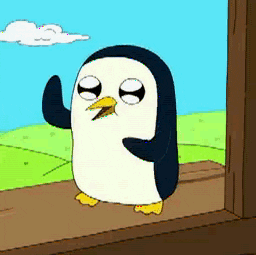